In [1]:
cd ..

/Users/ruipeng/Desktop/lemp


In [2]:
from environment.dynamic.simple2arm_env import Simple2ArmEnv
from objects.dynamic_object import DynamicObject
from robot.abstract_robot import DynamicRobotFactory
from objects.trajectory import WaypointLinearTrajectory
from robot.simple2arm_robot import Simple2ArmRobot
from planner.sipp_planner import SippPlanner

import numpy as np
# visualize environment
%matplotlib inline
import matplotlib.pyplot as plt
from utils.utils import seed_everything

pybullet build time: Mar 16 2022 13:26:26


In [3]:
waypoints = np.linspace(0, np.pi/4, 20).tolist()
waypoints = [np.array([p,p]) for p in waypoints]
traj = WaypointLinearTrajectory(waypoints=waypoints)
robot = Simple2ArmRobot(base_position=(1, 1, 0), base_orientation=(0, 0, 0, 1))
objs = DynamicObject(item=robot, trajectory=traj)

env = Simple2ArmEnv(objects=[objs])
num_samples = 1000

loading dynamic object
Loading robot from ../data/robot/simple2arm/2dof.urdf
Robot loaded with item_id 0
Loading robot from ../data/robot/simple2arm/2dof.urdf
Robot loaded with item_id 1


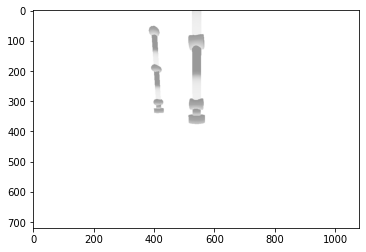

In [4]:
env.load()
plt.imshow(env.render())
plt.show()

In [ ]:
start, goal = np.array([0.] * 2), np.array([np.pi*7/8, 0])
while True:
    seed_everything(42)
    initial_planner = SippPlanner(num_samples=num_samples, stop_when_success=True)
    result = initial_planner.plan(env, start, goal, timeout=('time', 1000))
    if result.solution:
        print('success')
        break
    else:
        # sample a non-trival problem setting and solve
        start, goal = env.robot.sample_random_init_goal()

/Users/ruipeng/Desktop/lemp/planner/sipp_planner.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  edge_index = knn_graph(torch.FloatTensor(self.points), k=50, loop=True)


In [ ]:
result

In [7]:
# Visualization
from time import sleep
def visualize_traj(env, traj_agent):
    max_len_traj = 0
    for obj in env.objects:
        max_len_traj = max(max_len_traj, len(obj.trajectory.waypoints))
                           
    max_time_obs = max_len_traj-1
    speed = 1 / max_time_obs
    gifs = []
    max_len = max(len(traj_agent.waypoints), max_len_traj)

    for timestep in np.linspace(0,  max_len-1, 100):
        env.robot.set_config(traj_agent.get_spec(timestep))
        for obj in env.objects:
            obj.set_config_at_time(timestep)
        p.performCollisionDetection()
        sleep(0.1)
        gifs.append(p.getCameraImage(width=360, height=360, lightDirection=[1, 1, 1], shadow=1,
                                                 renderer=p.ER_BULLET_HARDWARE_OPENGL)[2])
    return gifs

loading dynamic object
Loading robot from ../data/robot/simple2arm/2dof.urdf
Robot loaded with item_id 0
Loading robot from ../data/robot/simple2arm/2dof.urdf
Robot loaded with item_id 1



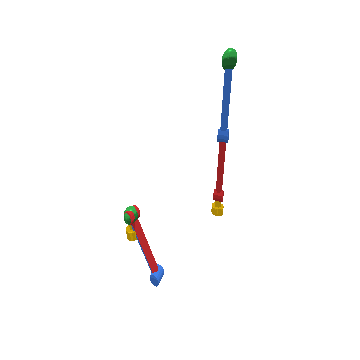

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
from utils.utils import save_gif
from IPython.display import HTML
import base64
from objects.trajectory import WaypointLinearTrajectory

env.load(GUI=True)

traj_agent = WaypointLinearTrajectory(result.solution)
gifs = visualize_traj(env, traj_agent)
save_gif(gifs, f'data/visualization/sipp.gif')
b64 = base64.b64encode(open(f'data/visualization/sipp.gif', 'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))